# Generation des données sur la production des déchets dans les différentes localités de Douala

In [318]:
from faker import Faker
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from prophet import Prophet

# <font color=red> Données à générer : Nom, quantité, date, localité, ville</font>

In [132]:
name = []
quantity = []
date = []
locality = []
city = []

In [133]:
np.random.seed(12)
fake = Faker()

In [134]:
for _ in range(100):
    name.append(fake.name())

In [135]:
len(name)

100

In [136]:
for _ in range(100):
    quantity.append(np.random.randint(1,101))

In [137]:
start_date = datetime(2022,11,1)
start_date.strftime("%Y-%m-%d %H:%M:%S")
end_date = datetime(2023,6,18)
end_date.strftime("%Y-%m-%d %H:%M:%S")
print(start_date), print(end_date)

2022-11-01 00:00:00
2023-06-18 00:00:00


(None, None)

In [138]:
for _ in range(100):
    date.append(fake.date_time_between(start_date, end_date))

In [139]:
print(date[0])

2023-01-30 21:44:41


In [140]:
df_bonamoussadi = pd.DataFrame(zip(name, quantity, date), columns=["name", "quantity %", "date"])

In [141]:
df_bonamoussadi.head()

,name,quantity %,date
0,Jennifer Ross,76,2023-01-30 21:44:41
1,Steven Harris,28,2022-12-21 00:32:24
2,Tyrone Hanna,7,2023-03-29 03:25:36
3,Brian Wagner,3,2023-05-28 19:46:51
4,Leah Morris,4,2023-05-02 01:35:32


In [142]:
df_bonamoussadi["city"] = "Bonamoussadi"

In [143]:
df_bonamoussadi

,name,quantity %,date,city
0,Jennifer Ross,76,2023-01-30 21:44:41,Bonamoussadi
1,Steven Harris,28,2022-12-21 00:32:24,Bonamoussadi
2,Tyrone Hanna,7,2023-03-29 03:25:36,Bonamoussadi
3,Brian Wagner,3,2023-05-28 19:46:51,Bonamoussadi
4,Leah Morris,4,2023-05-02 01:35:32,Bonamoussadi
...,...,...,...,...
95,David Chase,88,2023-02-06 14:00:09,Bonamoussadi
96,Shawn Perry,58,2023-03-08 09:14:16,Bonamoussadi
97,Anthony Padilla,55,2023-01-01 20:34:59,Bonamoussadi
98,Darren Williams,57,2023-05-08 09:58:47,Bonamoussadi


In [144]:
df_bonamoussadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        100 non-null    object        
 1   quantity %  100 non-null    int64         
 2   date        100 non-null    datetime64[ns]
 3   city        100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.2+ KB


## <font color=red>Fonction permetant de generer les données aléatoirement en fonction des localités</font>

In [405]:
def generate_data(city_name):
    
    from faker import Faker
    import numpy as np
    import pandas as pd
    from datetime import datetime
    name = []
    quantity = []
    date = []
    locality = []
    city = []
    
    #np.random.seed(12)
    #fake = Faker()
    
    for _ in range(5000):
        name.append(fake.name())
    
    for _ in range(5000):
        quantity.append(np.random.randint(1,101))
    
    start_date = datetime(2020,1,1)
    start_date.strftime("%Y-%m-%d %H:%M:%S")
    end_date = datetime(2023,6,18)
    end_date.strftime("%Y-%m-%d %H:%M:%S")
    
    
    for _ in range(5000):
        date.append(fake.date_time_between(start_date, end_date))
    
    #df_name = city[].lower()
    date = sorted(date)
    
    df= pd.DataFrame(zip(name, quantity, date), columns=["name", "quantity %", "date"])
    
    df['city'] = city_name
    df.to_csv(f"/home/wilson/Documents/wilson/hackaton_gestion_dechets/df_{city_name}.csv")
    
    return df
    
    
    
    

## <font color=red>Génération des données de quelques localité de la ville de Douala</font>

In [410]:
Dakar = generate_data("Dakar")

In [411]:
Bonamoussadi = generate_data("Bonamoussadi")

In [412]:
Logbaba = generate_data("Logbaba")

In [413]:
Bonaberie = generate_data("Bonaberie")

In [414]:
Nyalla = generate_data("Nyalla")

## <font color=red>Evolution de la population de Douala</font>

In [247]:
annee = [1916, 1920, 1924, 1927, 1931, 1933, 1935, 1937, 1939, 1941, 1944, 1947, 1949, 1954, 1956, 
         1976, 1987, 1991, 1999, 2005, 2016, 2018, 2020]
pop = [29400, 26400, 44500, 54600, 37000, 52600, 56500, 79400, 69800, 76700, 73800, 115500, 77600, 
       192400, 224300, 458426, 809852, 884000, 1448300, 1912426, 2860907, 3049034, 3375000]
pop = [x/1000 for x in pop]
pop

[29.4,
 26.4,
 44.5,
 54.6,
 37.0,
 52.6,
 56.5,
 79.4,
 69.8,
 76.7,
 73.8,
 115.5,
 77.6,
 192.4,
 224.3,
 458.426,
 809.852,
 884.0,
 1448.3,
 1912.426,
 2860.907,
 3049.034,
 3375.0]

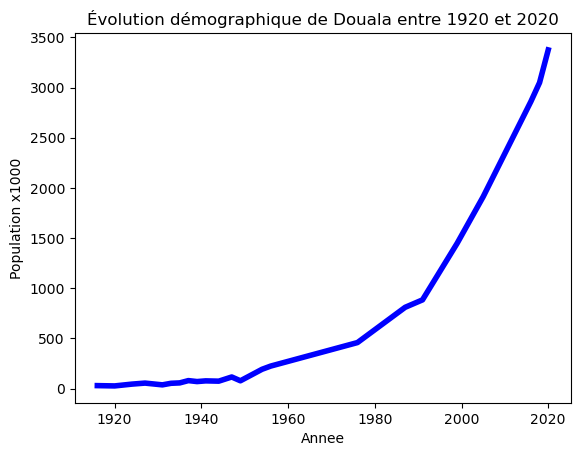

In [269]:
plt.plot(annee, pop, linewidth=4, c='b')
#plt.ylim([20000, 4000000])
plt.xlabel("Annee")
plt.ylabel("Population x1000")
plt.title("Évolution démographique de Douala entre 1920 et 2020")
plt.savefig("/home/wilson/Documents/wilson/hackaton_gestion_dechets/pop_douala.png")

## <font color=red>Importation des différents ensembles de données pour la construction des modèles de prévision</font>

In [415]:
df_bonaberie = pd.read_csv("/home/wilson/Documents/wilson/hackaton_gestion_dechets/df_Bonaberie.csv")

## <font color=red> Analyse Exploratoire des données des différentes localités</font>

In [416]:
df_bonaberie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   name        5000 non-null   object
 2   quantity %  5000 non-null   int64 
 3   date        5000 non-null   object
 4   city        5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [417]:
df_bonaberie.head()

,Unnamed: 0,name,quantity %,date,city
0,0,Loretta Martin,45,2020-01-01 01:40:44,Bonaberie
1,1,Heather Johnson,80,2020-01-01 03:13:34,Bonaberie
2,2,Grace Rogers DDS,72,2020-01-01 16:11:35,Bonaberie
3,3,James Williams,4,2020-01-02 01:58:02,Bonaberie
4,4,Eugene Gaines,40,2020-01-02 14:09:19,Bonaberie


In [418]:
df_bonaberie = df_bonaberie.drop("Unnamed: 0", axis=1)

In [419]:
df_bonaberie.head(n=10)

,name,quantity %,date,city
0,Loretta Martin,45,2020-01-01 01:40:44,Bonaberie
1,Heather Johnson,80,2020-01-01 03:13:34,Bonaberie
2,Grace Rogers DDS,72,2020-01-01 16:11:35,Bonaberie
3,James Williams,4,2020-01-02 01:58:02,Bonaberie
4,Eugene Gaines,40,2020-01-02 14:09:19,Bonaberie
5,Frances Sharp,20,2020-01-03 05:46:20,Bonaberie
6,Lisa Richardson,8,2020-01-03 09:13:21,Bonaberie
7,April Rhodes,1,2020-01-03 16:17:11,Bonaberie
8,Mark Morgan,97,2020-01-04 10:42:41,Bonaberie
9,Brian Baker,4,2020-01-04 12:02:13,Bonaberie


In [420]:
unique_date = df_bonaberie['date'][0]

In [421]:
len(unique_date)

19

In [422]:
unique_date[:10]

'2020-01-01'

In [423]:
#date_format = "%Y-%m-%d %H:%M:%S"
#unique_date=datetime.strptime(unique_date, date_format)

In [424]:
day = [x[:10] for x in df_bonaberie['date']]

In [425]:
df_bonaberie['day'] = day

In [426]:
df_bonaberie.head(n=10)

,name,quantity %,date,city,day
0,Loretta Martin,45,2020-01-01 01:40:44,Bonaberie,2020-01-01
1,Heather Johnson,80,2020-01-01 03:13:34,Bonaberie,2020-01-01
2,Grace Rogers DDS,72,2020-01-01 16:11:35,Bonaberie,2020-01-01
3,James Williams,4,2020-01-02 01:58:02,Bonaberie,2020-01-02
4,Eugene Gaines,40,2020-01-02 14:09:19,Bonaberie,2020-01-02
5,Frances Sharp,20,2020-01-03 05:46:20,Bonaberie,2020-01-03
6,Lisa Richardson,8,2020-01-03 09:13:21,Bonaberie,2020-01-03
7,April Rhodes,1,2020-01-03 16:17:11,Bonaberie,2020-01-03
8,Mark Morgan,97,2020-01-04 10:42:41,Bonaberie,2020-01-04
9,Brian Baker,4,2020-01-04 12:02:13,Bonaberie,2020-01-04


In [427]:
df_bonaberie['quantity'] = (df_bonaberie['quantity %']*80)/100

In [428]:
df_bonaberie.head(n=10)

,name,quantity %,date,city,day,quantity
0,Loretta Martin,45,2020-01-01 01:40:44,Bonaberie,2020-01-01,36.0
1,Heather Johnson,80,2020-01-01 03:13:34,Bonaberie,2020-01-01,64.0
2,Grace Rogers DDS,72,2020-01-01 16:11:35,Bonaberie,2020-01-01,57.6
3,James Williams,4,2020-01-02 01:58:02,Bonaberie,2020-01-02,3.2
4,Eugene Gaines,40,2020-01-02 14:09:19,Bonaberie,2020-01-02,32.0
5,Frances Sharp,20,2020-01-03 05:46:20,Bonaberie,2020-01-03,16.0
6,Lisa Richardson,8,2020-01-03 09:13:21,Bonaberie,2020-01-03,6.4
7,April Rhodes,1,2020-01-03 16:17:11,Bonaberie,2020-01-03,0.8
8,Mark Morgan,97,2020-01-04 10:42:41,Bonaberie,2020-01-04,77.6
9,Brian Baker,4,2020-01-04 12:02:13,Bonaberie,2020-01-04,3.2


## <font color=red> Préparation du jeu de données pour l'entraînement d'un modèle de prévision</font>

In [429]:
unique_day=df_bonaberie['day'].unique()

In [430]:
unique_day

array(['2020-01-01', '2020-01-02', '2020-01-03', ..., '2023-06-15',
       '2023-06-16', '2023-06-17'], dtype=object)

In [431]:
len(unique_day)

1239

In [434]:
quantity = []
for date in unique_day:
    df = df_bonaberie[df_bonaberie['day']==date]
    quantity.append(sum(df['quantity']))
    

In [435]:
quantity

[157.6,
 35.2,
 23.2,
 172.0,
 389.59999999999997,
 300.0,
 41.6,
 58.4,
 68.0,
 125.6,
 196.0,
 261.6,
 213.6,
 67.2,
 30.4,
 72.8,
 159.2,
 151.2,
 159.20000000000002,
 208.79999999999995,
 77.6,
 124.0,
 108.8,
 144.79999999999998,
 160.79999999999998,
 232.0,
 139.2,
 152.8,
 66.4,
 256.8,
 324.00000000000006,
 288.0,
 271.2,
 114.39999999999999,
 51.2,
 120.80000000000001,
 160.0,
 262.4,
 239.2,
 125.6,
 128.79999999999998,
 299.2,
 95.2,
 176.79999999999998,
 138.4,
 259.2,
 130.4,
 188.8,
 65.6,
 98.4,
 48.8,
 331.2,
 260.8,
 157.60000000000002,
 187.20000000000002,
 52.0,
 108.0,
 32.8,
 128.0,
 102.4,
 113.6,
 95.2,
 199.20000000000002,
 204.0,
 151.20000000000002,
 215.2,
 79.2,
 87.19999999999999,
 20.0,
 42.4,
 52.0,
 123.2,
 175.20000000000002,
 185.6,
 131.2,
 59.2,
 127.2,
 148.0,
 26.4,
 160.8,
 146.4,
 293.59999999999997,
 244.8,
 197.6,
 188.0,
 182.4,
 20.8,
 163.20000000000002,
 148.0,
 58.400000000000006,
 244.79999999999998,
 200.79999999999998,
 184.799999999999

In [436]:
len(quantity)

1239

In [437]:
new_df_bonaberie = pd.DataFrame(zip(unique_day, quantity), columns=["date", "quantity"])

In [438]:
new_df_bonaberie

,date,quantity
0,2020-01-01,157.6
1,2020-01-02,35.2
2,2020-01-03,23.2
3,2020-01-04,172.0
4,2020-01-05,389.6
...,...,...
1234,2023-06-13,281.6
1235,2023-06-14,144.0
1236,2023-06-15,120.8
1237,2023-06-16,340.0


In [439]:
new_df_bonaberie=new_df_bonaberie.rename(columns={'date':'ds', 'quantity':'y'})

In [440]:
new_df_bonaberie

,ds,y
0,2020-01-01,157.6
1,2020-01-02,35.2
2,2020-01-03,23.2
3,2020-01-04,172.0
4,2020-01-05,389.6
...,...,...
1234,2023-06-13,281.6
1235,2023-06-14,144.0
1236,2023-06-15,120.8
1237,2023-06-16,340.0


In [328]:
#renommage des variables

In [335]:
#df_bonaberie = df_bonaberie.rename(columns={"date": "ds", "quantity %":"y"})

In [334]:
#df_bonaberie.head(n=10)

In [441]:
#new_df = pd.DataFrame(zip(df_bonaberie['ds'], df_bonaberie['y']), columns=['ds', 'y'])

In [442]:
#new_df.info()

In [443]:
#new_df.sample(n=10)

## <font color=blue> Effectuons des prévisions avec prophet </font>

## <font color=red> Construction du modèle de prévision </font>

In [460]:
model = Prophet(daily_seasonality=True)
model.fit(new_df_bonaberie)

10:52:24 - cmdstanpy - INFO - Chain [1] start processing
10:52:25 - cmdstanpy - INFO - Chain [1] done processing


**On utilise ensuite make_future_dataframe afin de spécifier la période de prévision**.

In [461]:
period_in_hours = 24*30 # Heure * Nb de jours
future = model.make_future_dataframe(periods=24*7)

In [462]:
future

,ds
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
1402,2023-11-28
1403,2023-11-29
1404,2023-11-30
1405,2023-12-01


In [463]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1407 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.1 KB


## <font color=red> prédictions </font>

In [464]:
forecast = model.predict(df=future)

In [465]:
forecast.tail(n=10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1397,2023-11-23,163.423178,47.979868,289.490378,163.056923,163.768190,-0.393458,-0.393458,-0.393458,-3.692154,...,-0.972380,-0.972380,-0.972380,4.271076,4.271076,4.271076,0.0,0.0,0.0,163.029720
1398,2023-11-24,163.413969,50.921134,285.883069,163.043619,163.764627,6.677330,6.677330,6.677330,-3.692154,...,3.266856,3.266856,3.266856,7.102628,7.102628,7.102628,0.0,0.0,0.0,170.091299
1399,2023-11-25,163.404760,49.682670,286.615358,163.028041,163.762639,2.709889,2.709889,2.709889,-3.692154,...,-3.549034,-3.549034,-3.549034,9.951077,9.951077,9.951077,0.0,0.0,0.0,166.114649
1400,2023-11-26,163.395550,62.881053,283.452312,163.014932,163.757793,8.742309,8.742309,8.742309,-3.692154,...,-0.338254,-0.338254,-0.338254,12.772717,12.772717,12.772717,0.0,0.0,0.0,172.137859
1401,2023-11-27,163.386341,49.989109,287.474299,163.000518,163.751048,10.786194,10.786194,10.786194,-3.692154,...,-1.045231,-1.045231,-1.045231,15.523579,15.523579,15.523579,0.0,0.0,0.0,174.172536
1402,2023-11-28,163.377132,67.694020,285.387503,162.988336,163.746379,11.933938,11.933938,11.933938,-3.692154,...,-2.534322,-2.534322,-2.534322,18.160414,18.160414,18.160414,0.0,0.0,0.0,175.311070
1403,2023-11-29,163.367923,72.274338,299.434830,162.975966,163.743110,22.121867,22.121867,22.121867,-3.692154,...,5.172364,5.172364,5.172364,20.641656,20.641656,20.641656,0.0,0.0,0.0,185.489789
1404,2023-11-30,163.358713,66.621306,304.269127,162.964616,163.739569,18.263831,18.263831,18.263831,-3.692154,...,-0.972380,-0.972380,-0.972380,22.928365,22.928365,22.928365,0.0,0.0,0.0,181.622545
1405,2023-12-01,163.349504,73.196532,302.068806,162.950975,163.735767,24.559804,24.559804,24.559804,-3.692154,...,3.266856,3.266856,3.266856,24.985102,24.985102,24.985102,0.0,0.0,0.0,187.909308
1406,2023-12-02,163.340295,63.375790,296.507453,162.937581,163.731966,19.539542,19.539542,19.539542,-3.692154,...,-3.549034,-3.549034,-3.549034,26.780730,26.780730,26.780730,0.0,0.0,0.0,182.879837


In [472]:
ds = forecast['ds'].tail(n=10)
y = forecast['yhat'].tail(n=10)
ds = pd.DataFrame(zip(ds,y), columns=['ds', 'y'])
ds

,ds,y
0,2023-11-23,163.029720
1,2023-11-24,170.091299
2,2023-11-25,166.114649
3,2023-11-26,172.137859
4,2023-11-27,174.172536
5,2023-11-28,175.311070
6,2023-11-29,185.489789
7,2023-11-30,181.622545
8,2023-12-01,187.909308
9,2023-12-02,182.879837


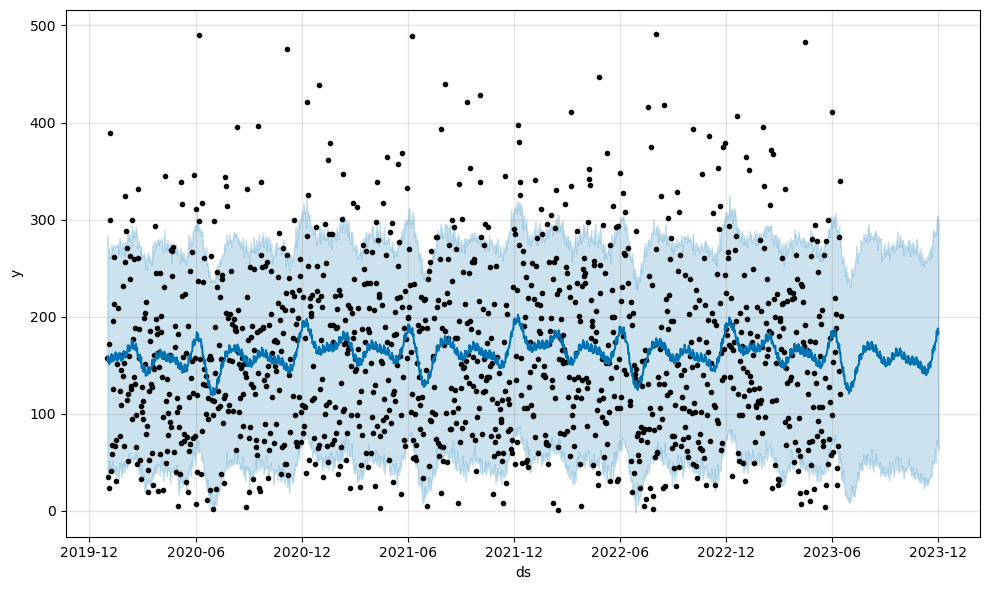

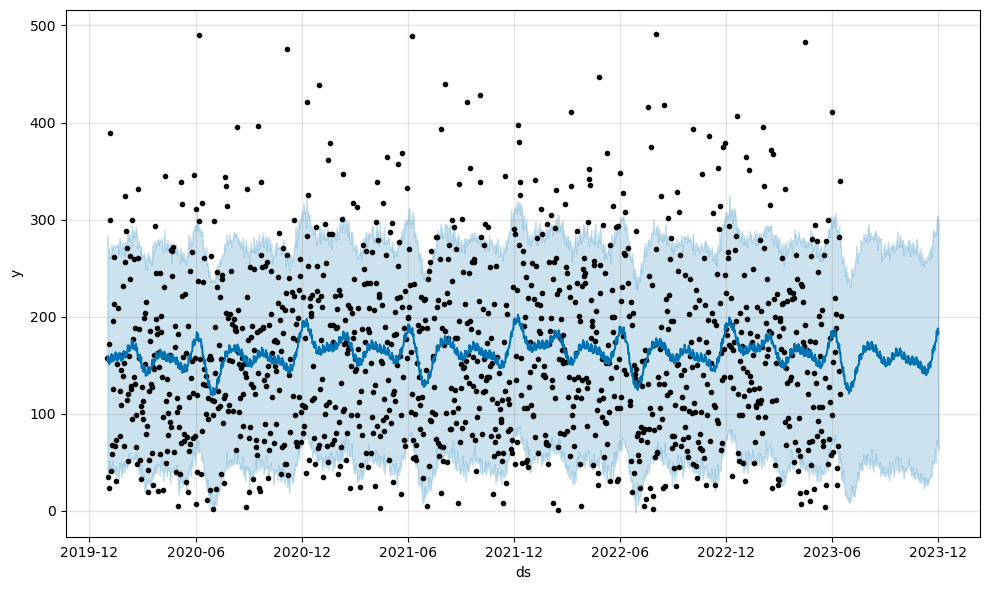

In [466]:
model.plot(forecast)

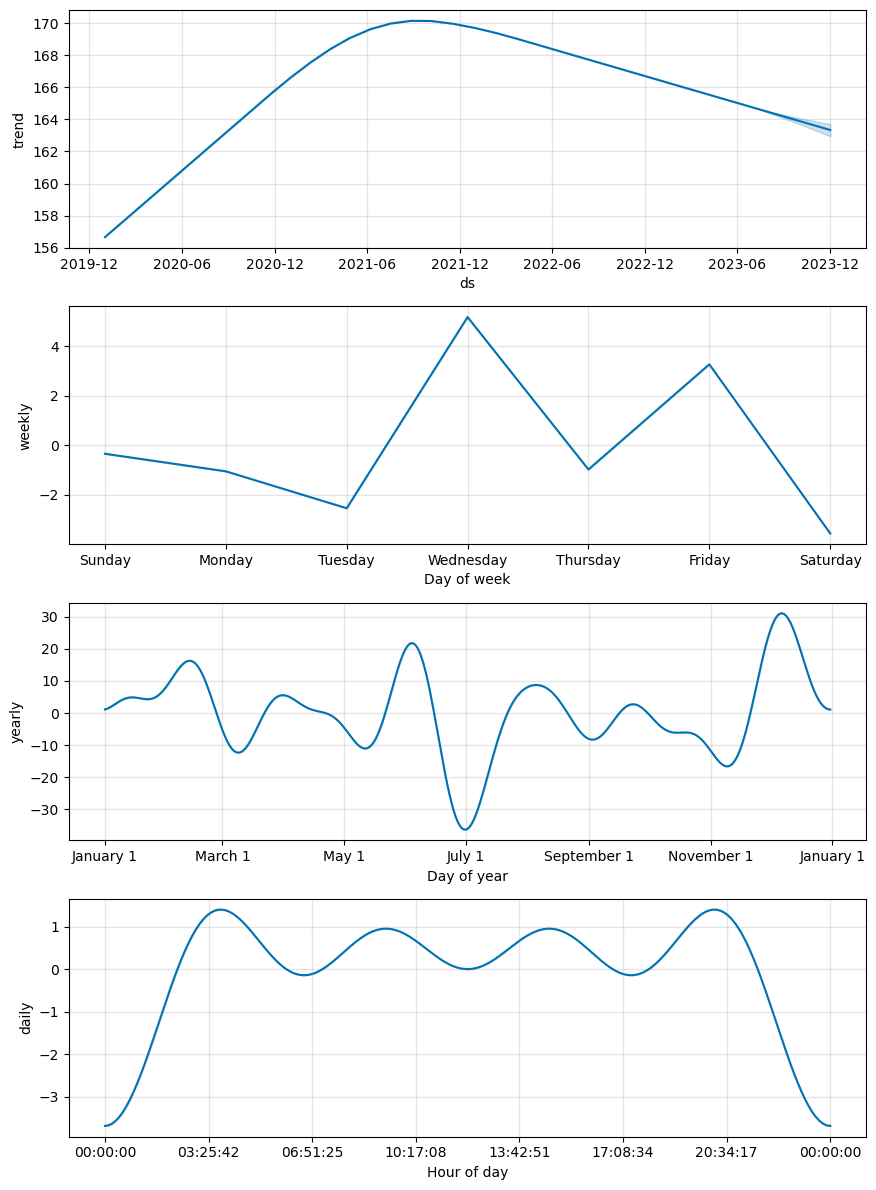

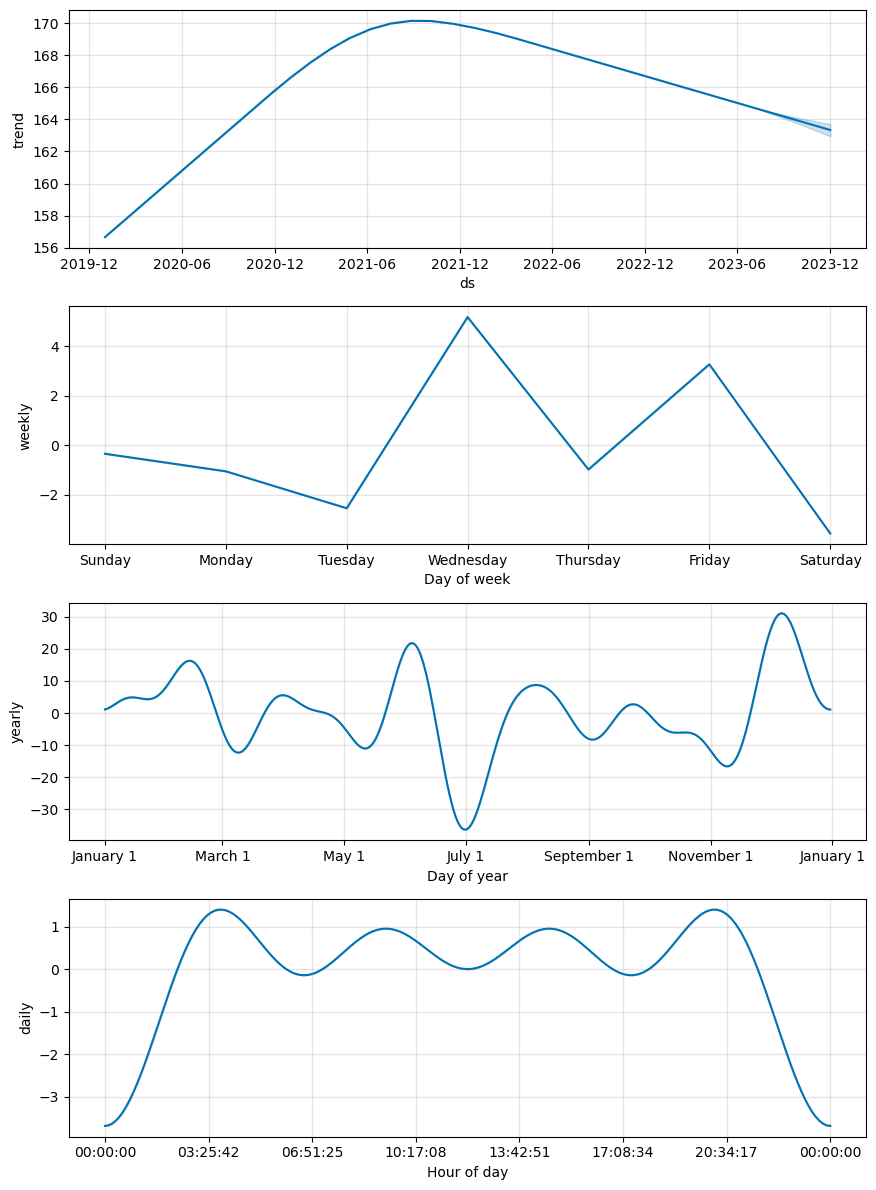

In [467]:
model.plot_components(forecast)